In [4]:
#import important libraries
import pandas as pd
import numpy as np
from pathlib import Path
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felixglindemann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felixglindemann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#prevent trouble shooting 

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [188]:
#loading of csv file

df = pd.read_csv('amazon_and_sustainability_copy.csv')
df

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Mentions,Tweet Urls,Tweet Type,Retweets Received,Favourites Received,Reply Received,...,User Id,Name,Username,User Bio,Verified or Non-Verified,Verified Type,Profile URL,User Followers,User Following,User Account Creation Date
0,"""1670800272237514755""",https://twitter.com/sjamunylti28715/status/167...,19 Jun 2023 14:26:41,"""RT @connectedworld: Did @amazon violate the C...","""connectedworld"",""amazon"",""FTC""",NaN,ReTweet,1,0,0,...,"""1659545261587193857""","""following me""",sjamunylti28715,"""Yooo look at this content Move money to ano...",Non-Verified,NaN,https://twitter.com/sjamunylti28715,0,0,19 May 2023 13:03:21
1,"""1670794366950989824""",https://twitter.com/connectedworld/status/1670...,19 Jun 2023 14:03:13,""".@FTC wants @amazon to pay a $25 million pena...","""FTC"",""amazon""","""https://connectedworld.com/amazon-under-fire-...",Tweet,0,0,0,...,"""58508576""","""Peggy Smedley""",connectedworld,"""Where IoT | Industry | Innovation Meet | Sust...",Non-Verified,NaN,https://twitter.com/connectedworld,28438,4888,20 Jul 2009 15:57:05
2,"""1670476744711602177""",https://twitter.com/connectedworld/status/1670...,18 Jun 2023 17:01:06,"""Did @amazon violate the Children’s Online #Pr...","""amazon"",""FTC""","""https://connectedworld.com/amazon-under-fire-...",Tweet,1,1,0,...,"""58508576""","""Peggy Smedley""",connectedworld,"""Where IoT | Industry | Innovation Meet | Sust...",Non-Verified,NaN,https://twitter.com/connectedworld,28438,4888,20 Jul 2009 15:57:05
3,"""1669908441802915842""",https://twitter.com/robniven/status/1669908441...,17 Jun 2023 03:22:52,"""RT @MikeCConTV: Exactly one month since it op...","""MikeCConTV"",""amazon""",NaN,ReTweet,1,0,0,...,"""285149069""","""Robert Niven""",robniven,"""@CarbonCure founder, Chair & CEO. On a missio...",Non-Verified,NaN,https://twitter.com/robniven,1448,1258,20 Apr 2011 16:28:40
4,"""1669814223357243393""",https://twitter.com/greeneatz/status/166981422...,16 Jun 2023 21:08:29,"""Managing #returns can get costly for retailer...","""amazon""","""https://fortune.com/2023/06/14/amazon-returns...",Tweet,0,0,0,...,"""213441650""","""Jane Richards Ⓥ""",greeneatz,"""Healthy eating for a green planet! Vegan nutr...",Non-Verified,NaN,https://twitter.com/greeneatz,1251,393,08 Nov 2010 23:00:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,"""181802307040722944""",https://twitter.com/ConstructConnx/status/1818...,19 Mar 2012 18:00:22,"""@Amazon $700M HQ in Seattle ""a walkable urban...","""amazon"",""Kaid_at_NRDC""","""http://ow.ly/9K88m""",Tweet,0,0,0,...,"""32495428""","""ConstructConnect""",ConstructConnx,"""Helping commercial construction firms simplif...",Non-Verified,NaN,https://twitter.com/ConstructConnx,54760,249,17 Apr 2009 17:46:03
4359,"""178223079753908225""",https://twitter.com/carol_baroudi/status/17822...,09 Mar 2012 20:57:48,"""I just bought: #GreenIT For Dummies' by @Caro...","""carol_baroudi"",""amazon""","""http://www.amazon.com/dp/B005DI8PEC/ref=cm_sw...",Tweet,0,0,0,...,"""293050624""","""Carol Baroudi""",carol_baroudi,"""author #Sustainability #Resist #GND #climatec...",Non-Verified,NaN,https://twitter.com/carol_baroudi,2197,2392,04 May 2011 17:34:26
4360,"""163438139178889216""",https://twitter.com/tipsstartups/status/163438...,29 Jan 2012 01:47:43,"""#gift #kids Just reviewed: 'Grow Your Own Piz...","""amazon""","""http://bit.ly/yb25rI""",Tweet,0,0,0,...,"""237250415""","""Vedz""",tipsstartups,NaN,Non-Verified,NaN,https://twitter.com/tipsstartups,217,22,12 Jan 2011 12:27:36
4361,"""163428844743827456""",https://twitter.com/AndreaMeyer/status/1634288...,29 Jan 2012 01:10:47,"""#gift #kids Just reviewed: 'Grow Your Own Piz...","""amazon""","""http://www.amazon.com/review/R3A2YDMOVV6G0O/r...",Tweet,0,0,1,...,"""16688904""","""Andrea Meyer""",AndreaMeyer,"""Founder Working Knowledge. Writer/ghostwriter...",Non-Verified,NaN,https://twitter.com/AndreaMeyer,1

In [189]:
#remove not relevant columns of data set

print(df.columns)

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time (UTC)', 'Tweet Content',
       'Tweet Mentions', 'Tweet Urls', 'Tweet Type', 'Retweets Received',
       'Favourites Received', 'Reply Received', 'Quote Received',
       'Bookmark Received', 'Impression Received', 'Tweet Location',
       'Tweet Language', 'User Id', 'Name', 'Username', 'User Bio',
       'Verified or Non-Verified', 'Verified Type', 'Profile URL',
       'User Followers', 'User Following', 'User Account Creation Date'],
      dtype='object')


In [190]:
df = df[['Tweet Id', 'Tweet URL', 'Tweet Content',
         'Retweets Received', 'Impression Received', 'Name', 'Username', 'User Bio',
       'Verified or Non-Verified', 'Verified Type',
       'User Followers', 'User Following', 'Tweet Type']]

df

,Tweet Id,Tweet URL,Tweet Content,Retweets Received,Impression Received,Name,Username,User Bio,Verified or Non-Verified,Verified Type,User Followers,User Following,Tweet Type
0,"""1670800272237514755""",https://twitter.com/sjamunylti28715/status/167...,"""RT @connectedworld: Did @amazon violate the C...",1,0,"""following me""",sjamunylti28715,"""Yooo look at this content Move money to ano...",Non-Verified,NaN,0,0,ReTweet
1,"""1670794366950989824""",https://twitter.com/connectedworld/status/1670...,""".@FTC wants @amazon to pay a $25 million pena...",0,98,"""Peggy Smedley""",connectedworld,"""Where IoT | Industry | Innovation Meet | Sust...",Non-Verified,NaN,28438,4888,Tweet
2,"""1670476744711602177""",https://twitter.com/connectedworld/status/1670...,"""Did @amazon violate the Children’s Online #Pr...",1,139,"""Peggy Smedley""",connectedworld,"""Where IoT | Industry | Innovation Meet | Sust...",Non-Verified,NaN,28438,4888,Tweet
3,"""1669908441802915842""",https://twitter.com/robniven/status/1669908441...,"""RT @MikeCConTV: Exactly one month since it op...",1,0,"""Robert Niven""",robniven,"""@CarbonCure founder, Chair & CEO. On a missio...",Non-Verified,NaN,1448,1258,ReTweet
4,"""1669814223357243393""",https://twitter.com/greeneatz/status/166981422...,"""Managing #returns can get costly for retailer...",0,4,"""Jane Richards Ⓥ""",greeneatz,"""Healthy eating for a green planet! Vegan nutr...",Non-Verified,NaN,1251,393,Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,"""181802307040722944""",https://twitter.com/ConstructConnx/status/1818...,"""@Amazon $700M HQ in Seattle ""a walkable urban...",0,0,"""ConstructConnect""",ConstructConnx,"""Helping commercial construction firms simplif...",Non-Verified,NaN,54760,249,Tweet
4359,"""178223079753908225""",https://twitter.com/carol_baroudi/status/17822...,"""I just bought: #GreenIT For Dummies' by @Caro...",0,0,"""Carol Baroudi""",carol_baroudi,"""author #Sustainability #Resist #GND #climatec...",Non-Verified,NaN,2197,2392,Tweet
4360,"""163438139178889216""",https://twitter.com/tipsstartups/status/163438...,"""#gift #kids Just reviewed: 'Grow Your Own Piz...",0,0,"""Vedz""",tipsstartups,NaN,Non-Verified,NaN,217,22,Tweet
4361,"""163428844743827456""",https://twitter.com/AndreaMeyer/status/1634288...,"""#gift #kids Just reviewed: 'Grow Your Own Piz...",0,0,"""Andrea Meyer""",AndreaMeyer,"""Founder Working Knowledge. Writer/ghostwriter...",Non-Verified,NaN,16424,17433,Tweet


Statistical Description of Dataset

In [195]:
# Generate descriptive statistics of numerical features 
desc_stats = df[['Retweets Received', 'User Followers', 'User Following']].describe()

# Count number of negative values for each column
negative_counts = (df[['Retweets Received', 'User Followers', 'User Following']] < 0).sum()

# Add negative counts to descriptive statistics
desc_stats.loc['negative_values'] = negative_counts

# Check for outliers
Q1 = df[['Retweets Received', 'User Followers', 'User Following']].quantile(0.25)
Q3 = df[['Retweets Received', 'User Followers', 'User Following']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers for each column
outliers = ((df[['Retweets Received', 'User Followers', 'User Following']] < lower_bound) | (df[['Retweets Received', 'User Followers', 'User Following']] > upper_bound)).sum()

# Add outliers to descriptive statistics
desc_stats.loc['outliers'] = outliers

# Print the descriptive statistics
print(desc_stats)


                 Retweets Received  User Followers  User Following
count                  4363.000000    4.363000e+03     4363.000000
mean                      4.987165    1.486178e+04     4008.469631
std                      10.830943    2.596981e+05    13254.854374
min                       0.000000    0.000000e+00        0.000000
25%                       0.000000    4.040000e+02      307.000000
50%                       1.000000    1.537000e+03     1063.000000
75%                       3.000000    5.964500e+03     3007.000000
max                      63.000000    1.585339e+07   367067.000000
negative_values           0.000000    0.000000e+00        0.000000
outliers                660.000000    6.360000e+02      382.000000


In [197]:
# replace outliers with the next highest value that is not an outlier 

# For 'Retweets Received' column
upper_bound_tweetsCount = df['Retweets Received'].quantile(0.75) + 1.5*(df['Retweets Received'].quantile(0.75) - df['Retweets Received'].quantile(0.25))
max_non_outlier_tweetsCount = df[df['Retweets Received'] <= upper_bound_tweetsCount]['Retweets Received'].max()
df['Retweets Received'] = np.where(df['Retweets Received'] > upper_bound_tweetsCount, max_non_outlier_tweetsCount, df['Retweets Received'])

# For 'following' column
upper_bound_impressions = df['User Following'].quantile(0.75) + 1.5*(df['User Following'].quantile(0.75) - df['User Following'].quantile(0.25))
max_non_outlier_impressions = df[df['User Following'] <= upper_bound_impressions]['User Following'].max()
df['User Following'] = np.where(df['User Following'] > upper_bound_impressions, max_non_outlier_impressions, df['User Following'])


# For 'followers' column
upper_bound_followers = df['User Followers'].quantile(0.75) + 1.5*(df['User Followers'].quantile(0.75) - df['User Followers'].quantile(0.25))
max_non_outlier_followers = df[df['User Followers'] <= upper_bound_followers]['User Followers'].max()
df['User Followers'] = np.where(df['User Followers'] > upper_bound_followers, max_non_outlier_followers, df['User Followers'])

/var/folders/bb/2dqs_0hs045bm6zshnf3_tth0000gn/T/ipykernel_22490/2335835738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Retweets Received'] = np.where(df['Retweets Received'] > upper_bound_tweetsCount, max_non_outlier_tweetsCount, df['Retweets Received'])
/var/folders/bb/2dqs_0hs045bm6zshnf3_tth0000gn/T/ipykernel_22490/2335835738.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User Following'] = np.where(df['User Following'] > upper_bound_impressions, max_non_outlier_impressions, df['Us

In [198]:
#check again for outliers 

# Generate descriptive statistics of numerical features 
desc_stats = df[['Retweets Received', 'User Followers', 'User Following']].describe()

# Count number of negative values for each column
negative_counts = (df[['Retweets Received', 'User Followers', 'User Following']] < 0).sum()

# Add negative counts to descriptive statistics
desc_stats.loc['negative_values'] = negative_counts

# Check for outliers
Q1 = df[['Retweets Received', 'User Followers', 'User Following']].quantile(0.25)
Q3 = df[['Retweets Received', 'User Followers', 'User Following']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers for each column
outliers = ((df[['Retweets Received', 'User Followers', 'User Following']] < lower_bound) | (df[['Retweets Received', 'User Followers', 'User Following']] > upper_bound)).sum()

# Add outliers to descriptive statistics
desc_stats.loc['outliers'] = outliers

# Print the descriptive statistics
print(desc_stats)


                 Retweets Received  User Followers  User Following
count                  4363.000000     4363.000000     4363.000000
mean                      2.146230     4089.938345     2015.867293
std                       2.529818     5002.089328     2212.693867
min                       0.000000        0.000000        0.000000
25%                       0.000000      404.000000      307.000000
50%                       1.000000     1537.000000     1063.000000
75%                       3.000000     5964.500000     3007.000000
max                       7.000000    14218.000000     7036.000000
negative_values           0.000000        0.000000        0.000000
outliers                  0.000000        0.000000        0.000000


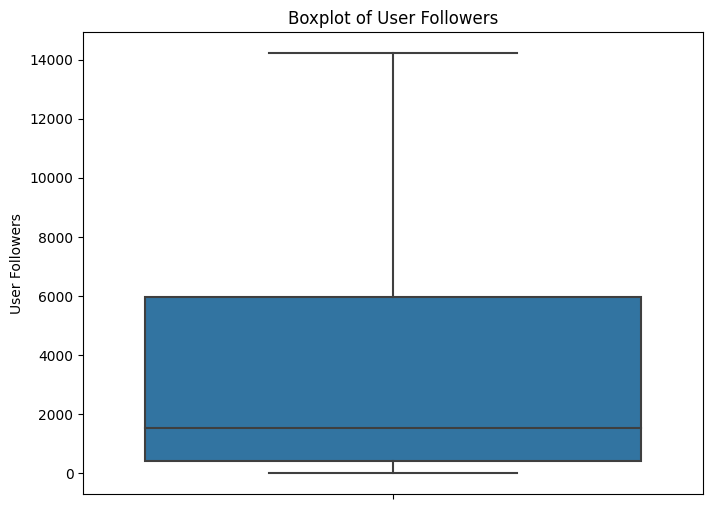

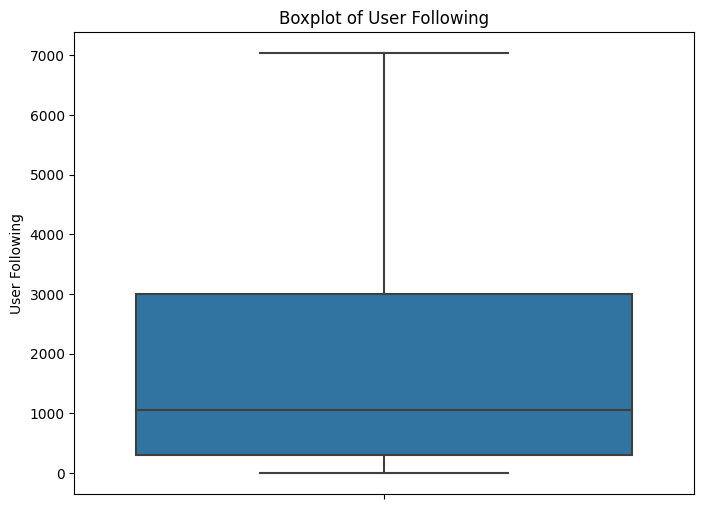

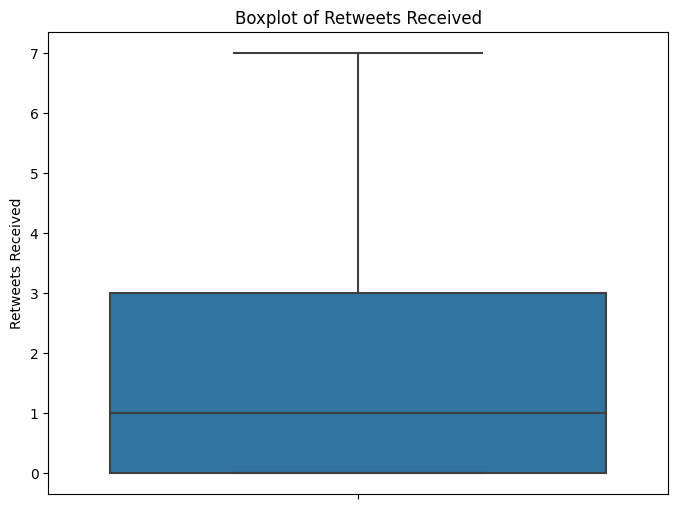

In [199]:
# boxplots of variables

# List of numerical variables
numerical_vars = ['User Followers', 'User Following', 'Retweets Received']

# Create boxplots for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title('Boxplot of ' + var)
    plt.show()

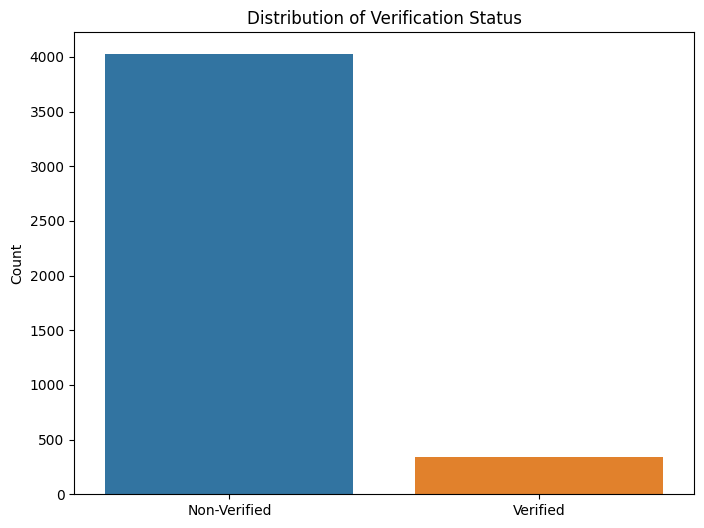

In [223]:
# Distribution of Verification

# Count the number of 'Verified' and 'Non-Verified' users
verification_counts = df['Verified or Non-Verified'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=verification_counts.index, y=verification_counts.values)
plt.title('Distribution of Verification Status')
plt.ylabel('Count')
plt.show()


Expert Prioritization -

the next section concerns itself with assigning the authors of tweets an expertise score


In [117]:
#score for amount of likes

# Define the min-max normalization function
def min_max_normalize(series, new_min, new_max):
    old_min = series.min()
    old_max = series.max()
    return (series - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

# Apply the min-max normalization to the numerical features of the dataset

df['normalized_followers'] = min_max_normalize(df['User Followers'], 0, 20).round(2)
df['normalized_retweets'] = min_max_normalize(df['Retweets Received'], 0, 20).round(2)
df['normalized_following'] = min_max_normalize(df['User Following'], 0, 20).round(2)

# Apply the subscores for binary features

df['score_verification'] = np.where(df['Verified or Non-Verified'] == 'Verified', 20, 0)

bio_keywords = ['sustainability', 'environment', 'conservation', 'green', 'vegan', 'recycling', 'renewable', 'organic', 
                'ecosystem', 'biodiversity', 'carbon-neutral', 'climate', 'compost', 
                'deforestation', 'emissions', 'fair-trade', 'biodegradable', 'sustainable',
                'solar', 'wind', 'hydroelectric', 'geothermal', 'biomass', 'earth-friendly', 
                'eco-friendly', 'zero-waste', 'pollution']

df['User Bio'] = df['User Bio'].astype(str)
df['bio_score'] = df['User Bio'].apply(lambda bio: 20 if any(keyword in bio for keyword in bio_keywords) else 0)


#calculate expertise score
df['expertise_score'] = df['normalized_following'] + df['normalized_followers'] + df['normalized_retweets'] + df['score_verification'] + df['bio_score']

# Sort the DataFrame by the 'sum_normalized' column in descending order
sorted_df = df.sort_values(by='expertise_score', ascending=False)

sorted_df.to_csv('sorted_df.csv', index=False)

# Display the sorted DataFrame
sorted_df






/var/folders/bb/2dqs_0hs045bm6zshnf3_tth0000gn/T/ipykernel_22490/3026330338.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_followers'] = min_max_normalize(df['User Followers'], 0, 20).round(2)
/var/folders/bb/2dqs_0hs045bm6zshnf3_tth0000gn/T/ipykernel_22490/3026330338.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_retweets'] = min_max_normalize(df['Retweets Received'], 0, 20).round(2)
/var/folders/bb/2dqs_0hs045bm6zshnf3_tth0000gn/T/ipykernel_22490/3026330338.py:13:

,Tweet Id,Tweet URL,Tweet Content,Retweets Received,Impression Received,Name,Username,User Bio,Verified or Non-Verified,Verified Type,User Followers,User Following,normalized_followers,normalized_retweets,normalized_following,score_verification,bio_score,expertise_score
80,"""1634885196473581570""",https://twitter.com/WeDontHaveTime/status/1634...,"""Dear @amazon, ⚠\nEver thought about making do...",6,1632,"""We Don't Have Time""",WeDontHaveTime,"""Welcome to the social media for climate solut...",Verified,business,14218,7036,20.00,17.14,20.00,20,20,97.14
848,"""1465268099469516803""",https://twitter.com/WeDontHaveTime/status/1465...,"""#CyberMonday is the biggest online retail day...",4,0,"""We Don't Have Time""",WeDontHaveTime,"""Welcome to the social media for climate solut...",Verified,business,14218,7036,20.00,11.43,20.00,20,20,91.43
2815,"""1075796512146370560""",https://twitter.com/mwt2008/status/10757965121...,"""RT @THEnergyNet: Draft map of corporate #wind...",7,0,"""Mark W Tebbutt""",mwt2008,"""IT professional. 0 carbon /air pollution home...",Verified,blue,6569,6442,9.24,20.00,18.31,20,20,87.55
1610,"""1329108726280761356""",https://twitter.com/WMBtweets/status/132910872...,"""RT @Signifycompany: Signify signs the @Amazon...",3,0,"""We Mean Business Coalition""",WMBtweets,"""Working with the world’s most influential bus...",Verified,business,14218,6383,20.00,8.57,18.14,20,20,86.71
1477,"""1351565612896694272""",https://twitter.com/cnsrvtxns4nrg/status/13515...,"""RT @AEEnet: REPORT: How large clean #energy b...",5,0,"""Conservative Texans For Energy Innovation""",cnsrvtxns4nrg,"""More competition, free market solutions, job ...",Verified,business,7447,7036,10.48,14.29,20.00,20,20,84.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,"""700370685353447425""",https://twitter.com/Shane_Dunne7/status/700370...,"""Great to see @amazon striving towards better ...",0,0,"""Shane Dunne""",Shane_Dunne7,nan,Non-Verified,NaN,3,5,0.00,0.00,0.01,0,0,0.01
229,"""1590383748679229440""",https://twitter.com/truvalyoubot/status/159038...,"""Value group ""Sustainability"" made a post abou...",0,0,"""truvalyoubot""",truvalyoubot,"""A #TwitterBot for @truvalyouapp""",Non-Verified,NaN,4,1,0.01,0.00,0.00,0,0,0.01
2439,"""1164204139452276737""",https://twitter.com/EnergyPolls/status/1164204...,"""Would you buy your Energy [power/gas] from Am...",0,0,"""Energy Polls""",EnergyPolls,"""“Stimulating energy polls!” Marketing, politi...",Non-Verified,NaN,0,0,0.00,0.00,0.00,0,0,0.00
1298,"""1380083169672589317""",https://twitter.com/AssholeAmazon/status/13800...,"""@oliviakelly08 Moments like this are why we i...",0,0,"""AssholeAmazon""",AssholeAmazon,"""Unofficial Twitter account of Amazon. Contact...",Non-Verified,NaN,0,1,0.00,0.00,0.00,0,0,0.00


In [ ]:
#adding a tweet index to the dataframe


sorted_df['tweet_index'] = range(len(sorted_df))

# Display the sorted DataFrame with the nex index
sorted_df

In [123]:
#overview of expert score and sub scores


sorted_df['expertise_score'].describe()
#sorted_df['normalized_followers'].describe() 
#sorted_df['normalized_following'].describe() #outlier check
#sorted_df['normalized_retweets'].describe() #outlier check
#sorted_df['score_verification'].describe() 
#sorted_df['bio_score'].describe()

count    4363.000000
mean       23.373122
std        18.080682
min         0.000000
25%         8.290000
50%        21.060000
75%        32.790000
max        97.140000
Name: expertise_score, dtype: float64

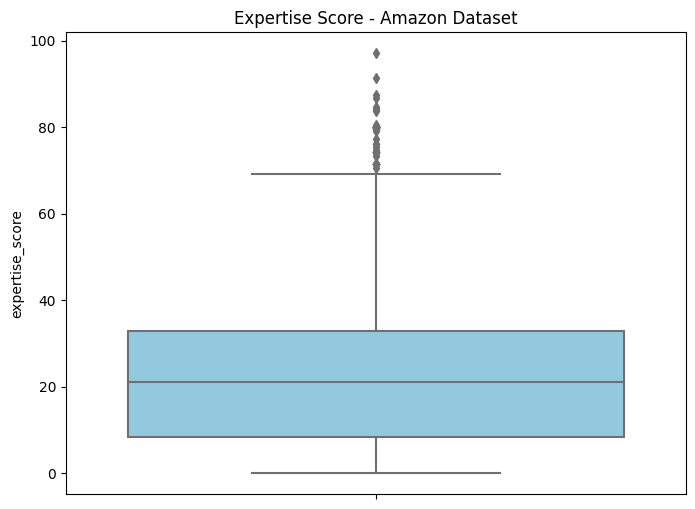

In [231]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=sorted_df['expertise_score'], color='skyblue')
plt.title('Expertise Score - Amazon Dataset')
plt.show()


Preprocessing of Tweets -

The next section will concern itself with the cleaning, stopword removal, tokenization and stemming of Tweets

In [175]:
#Tweet Cleaning

def tweet_cleaning(tweets):

    #removal of hashtags and mentions
    tweets = re.sub(r'#\w+|@\w+', '', tweets)
    
    #removal of URLs
    tweets = re.sub(r'http\S+|www\S+', '', tweets)

    #removal of special characters 
    tweets = re.sub(r'[^\w\s]', '', tweets)

    #removal of numbers
    tweets = re.sub(r'\d+', '', tweets)

    return tweets

clean_tweets = sorted_df['Tweet Content'].apply(tweet_cleaning)
clean_df = pd.DataFrame(clean_tweets)
clean_df.columns = ['Clean_Tweet']
clean_df

,Clean_Tweet
80,Dear \nEver thought about making doorstep del...
848,is the biggest online retail day of the year ...
2815,RT Draft map of corporate amp gt MW Join L...
1610,RT Signify signs the and initiative The Cli...
1477,RT REPORT How large clean buyers like ...
...,...
3923,Great to see striving towards better sustaina...
229,Value group Sustainability made a post about ...
2439,Would you buy your Energy powergas from Amazon...
1298,Moments like this are why we issue our incred...


In [130]:
#stopword removal

stop_words = set(stopwords.words('english'))

def stopword_removal(tweets):
    tokens =word_tokenize(tweets)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_words)


#removed_tweets = clean_df['Clean_Tweet'].apply(stopword_removal)
#removed_df = pd.DataFrame(removed_tweets)
#removed_df.columns = ['Clean_Tweet']
#removed_df

clean_df['Removed_Tweet'] = clean_df['Clean_Tweet'].apply(stopword_removal)
clean_df


,Clean_Tweet,Removed_Tweet
80,Dear \nEver thought about making doorstep del...,Dear Ever thought making doorstep delivery sus...
848,is the biggest online retail day of the year ...,biggest online retail day year online retailer...
2815,RT Draft map of corporate amp gt MW Join L...,RT Draft map corporate amp gt MW Join LinkedIn...
1610,RT Signify signs the and initiative The Cli...,RT Signify signs initiative Climate Pledge sha...
1477,RT REPORT How large clean buyers like ...,RT REPORT large clean buyers like meeting
...,...,...
3923,Great to see striving towards better sustaina...,Great see striving towards better sustainabili...
229,Value group Sustainability made a post about ...,Value group Sustainability made post View post
2439,Would you buy your Energy powergas from Amazon...,Would buy Energy powergas Amazon
1298,Moments like this are why we issue our incred...,Moments like issue incredible delivery drivers...


In [131]:
#lowercasing of words

def lowercase_text(text):
    return text.lower()

# Apply the function to your dataframe
clean_df['Lowercase_Tweet'] = clean_df['Removed_Tweet'].apply(lowercase_text)

# Display the dataframe
clean_df

,Clean_Tweet,Removed_Tweet,Lowercase_Tweet
80,Dear \nEver thought about making doorstep del...,Dear Ever thought making doorstep delivery sus...,dear ever thought making doorstep delivery sus...
848,is the biggest online retail day of the year ...,biggest online retail day year online retailer...,biggest online retail day year online retailer...
2815,RT Draft map of corporate amp gt MW Join L...,RT Draft map corporate amp gt MW Join LinkedIn...,rt draft map corporate amp gt mw join linkedin...
1610,RT Signify signs the and initiative The Cli...,RT Signify signs initiative Climate Pledge sha...,rt signify signs initiative climate pledge sha...
1477,RT REPORT How large clean buyers like ...,RT REPORT large clean buyers like meeting,rt report large clean buyers like meeting
...,...,...,...
3923,Great to see striving towards better sustaina...,Great see striving towards better sustainabili...,great see striving towards better sustainabili...
229,Value group Sustainability made a post about ...,Value group Sustainability made post View post,value group sustainability made post view post
2439,Would you buy your Energy powergas from Amazon...,Would buy Energy powergas Amazon,would buy energy powergas amazon
1298,Moments like this are why we issue our incred...,Moments like issue incredible delivery drivers...,moments like issue incredible delivery drivers...


In [132]:
# stemming of words

def stem_text(text):
    stemmer = PorterStemmer()
    tokenized_text = word_tokenize(text)
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokenized_text])
    return stemmed_text

clean_df['Stemmed_Text'] = clean_df['Lowercase_Tweet'].apply(stem_text)
clean_df



,Clean_Tweet,Removed_Tweet,Lowercase_Tweet,Stemmed_Text
80,Dear \nEver thought about making doorstep del...,Dear Ever thought making doorstep delivery sus...,dear ever thought making doorstep delivery sus...,dear ever thought make doorstep deliveri susta...
848,is the biggest online retail day of the year ...,biggest online retail day year online retailer...,biggest online retail day year online retailer...,biggest onlin retail day year onlin retail use...
2815,RT Draft map of corporate amp gt MW Join L...,RT Draft map corporate amp gt MW Join LinkedIn...,rt draft map corporate amp gt mw join linkedin...,rt draft map corpor amp gt mw join linkedin gr...
1610,RT Signify signs the and initiative The Cli...,RT Signify signs initiative Climate Pledge sha...,rt signify signs initiative climate pledge sha...,rt signifi sign initi climat pledg share best ...
1477,RT REPORT How large clean buyers like ...,RT REPORT large clean buyers like meeting,rt report large clean buyers like meeting,rt report larg clean buyer like meet
...,...,...,...,...
3923,Great to see striving towards better sustaina...,Great see striving towards better sustainabili...,great see striving towards better sustainabili...,great see strive toward better sustain big way
229,Value group Sustainability made a post about ...,Value group Sustainability made post View post,value group sustainability made post view post,valu group sustain made post view post
2439,Would you buy your Energy powergas from Amazon...,Would buy Energy powergas Amazon,would buy energy powergas amazon,would buy energi powerga amazon
1298,Moments like this are why we issue our incred...,Moments like issue incredible delivery drivers...,moments like issue incredible delivery drivers...,moment like issu incred deliveri driver pissju...


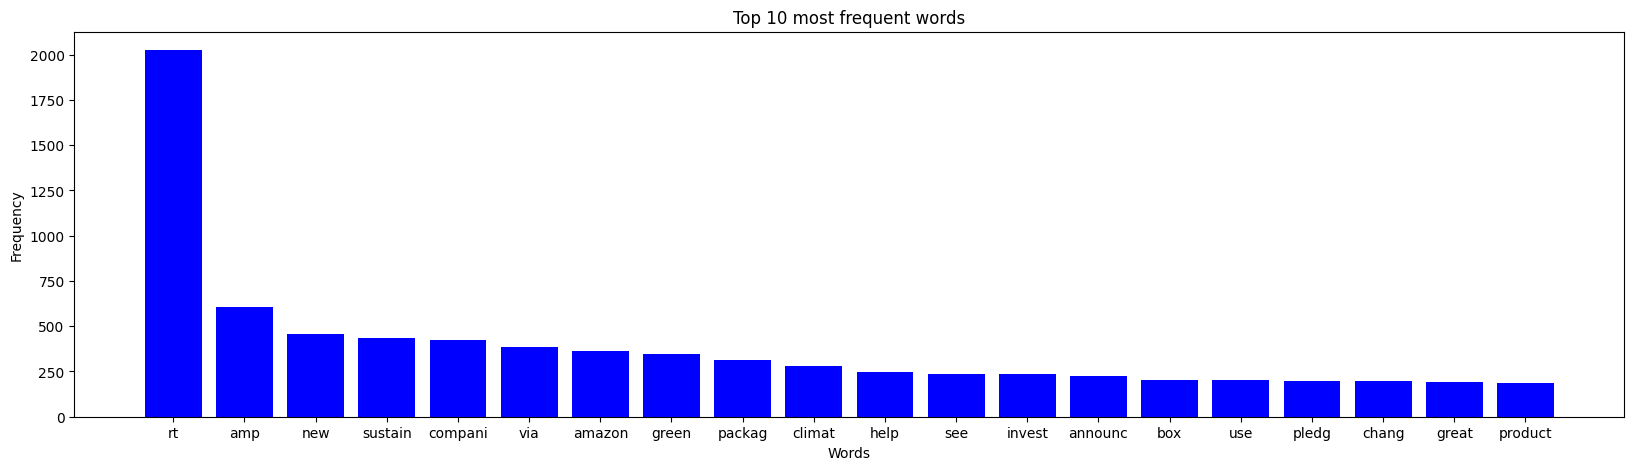

In [133]:
# Split the sentences into words and flatten the list
all_words = [word for sentence in clean_df['Stemmed_Text'] for word in sentence.split()]

# Count the frequency of each word
freq_dist = nltk.FreqDist(all_words)

# Use the 10 most common words
common_words = freq_dist.most_common(20)

# Separate the words and their counts into two lists
words, counts = zip(*common_words)

# Create the bar chart
plt.figure(figsize=(20,5))
plt.bar(words, counts, color='b')
plt.title('Top 10 most frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


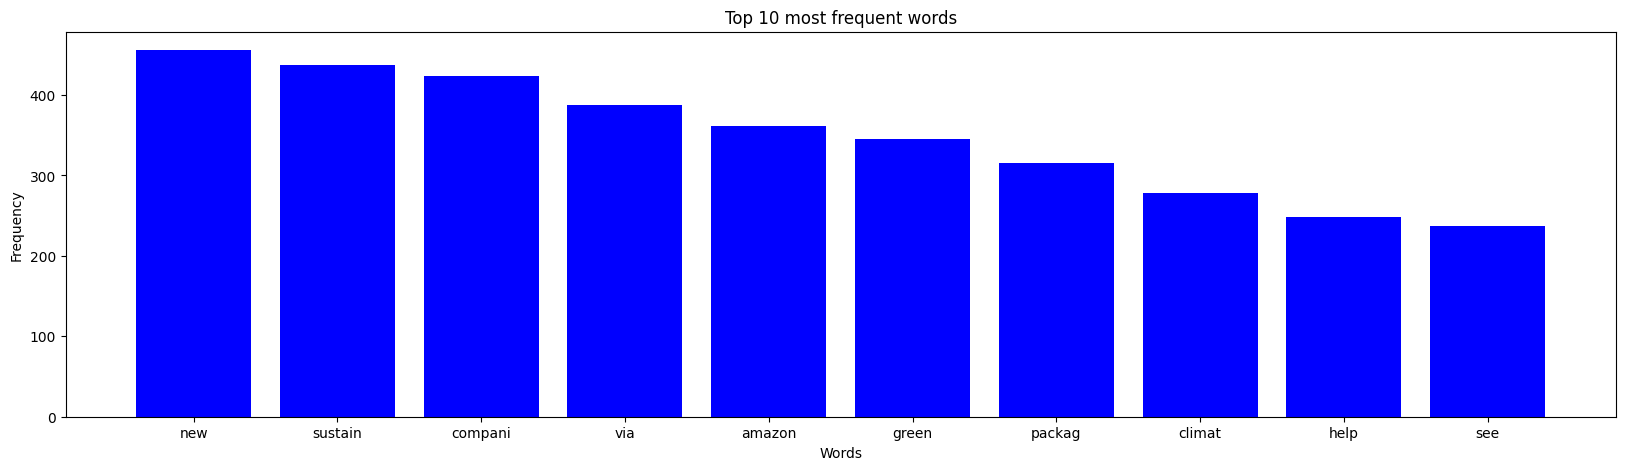

In [134]:
#remove frequent terms

# Define the list of words to remove
words_to_remove = [word for word, freq in freq_dist.most_common(2)]

# Apply the lambda function to the 'Stemmed_Text' column
clean_df['Stemmed_Text_removed'] = clean_df['Stemmed_Text'].apply(lambda text: ' '.join(word for word in text.split() if word not in words_to_remove))


# Apply the lambda function to the 'Stemmed_Text' column
clean_df['Stemmed_Text_removed'] = clean_df['Stemmed_Text'].apply(lambda text: ' '.join(word for word in text.split() if word not in words_to_remove))

#check most frequent terms again
# Split the sentences into words and flatten the list
all_words = [word for sentence in clean_df['Stemmed_Text_removed'] for word in sentence.split()]

# Count the frequency of each word
freq_dist = nltk.FreqDist(all_words)

# Use the 10 most common words
common_words = freq_dist.most_common(10)

# Separate the words and their counts into two lists
words, counts = zip(*common_words)

# Create the bar chart
plt.figure(figsize=(20,5))
plt.bar(words, counts, color='b')
plt.title('Top 10 most frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Expert Prioritization in LDA -

In this section the expertisen scores and preprocessed tweets are combined in a new dataframe

In [135]:
#create new dataframe for cleaned tweets and expertise score


tweets_final = pd.DataFrame()
tweets_final['tweets'] = clean_df['Stemmed_Text_removed']
tweets_final['expertise_score'] = sorted_df['expertise_score']

# Create a new column 'tweet_index' that copies the current index
tweets_final['tweet_index'] = tweets_final.index

tweets_final


,tweets,expertise_score,tweet_index
80,dear ever thought make doorstep deliveri susta...,97.14,80
848,biggest onlin retail day year onlin retail use...,91.43,848
2815,draft map corpor gt mw join linkedin group cor...,87.55,2815
1610,signifi sign initi climat pledg share best pra...,86.71,1610
1477,report larg clean buyer like meet,84.77,1477
...,...,...,...
3923,great see strive toward better sustain big way,0.01,3923
229,valu group sustain made post view post,0.01,229
2439,would buy energi powerga amazon,0.00,2439
1298,moment like issu incred deliveri driver pissju...,0.00,1298


In [136]:
#exploring distribution of expertise score

tweets_final['expertise_score'].describe()


count    4363.000000
mean       23.373122
std        18.080682
min         0.000000
25%         8.290000
50%        21.060000
75%        32.790000
max        97.140000
Name: expertise_score, dtype: float64

In [224]:
# List of numerical variables
expertise_score_var = ['expertise_score']

# Create boxplots for each numerical variable
for var in expertise_score_var:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title('Boxplot of ' + var)
    plt.show()

KeyError: 'expertise_score'

<Figure size 800x600 with 0 Axes>

Topic Modelling -

The next section concerns itself with three different scenarios involving an LDA model (1. no weights, 2. random weights, 3. expertise weights) 

In [140]:
#Definition of relevant functions

import nltk
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import corpus2csc

#calculate coherence score
def calculate_coherence_scores(texts, start=2, end=15, step=1):
    # Prepare a dictionary and corpus for Gensim
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    coherence_scores = []
    for num_topics in range(start, end, step):
        # Train an LDA model
        lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

        # Calculate the coherence score for this number of topics
        coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_scores.append((num_topics, coherence_score))

    return coherence_scores

#plot coherence scores
def plot_coherence_scores(coherence_scores):
    # Extract the number of topics and coherence scores
    num_topics_list, coherence_scores_list = zip(*coherence_scores)

    # Plot the coherence scores
    plt.plot(num_topics_list, coherence_scores_list, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Scores vs. Number of Topics')
    plt.grid()
    plt.show()


#train lda model
def train_lda_model(texts, num_topics):
    # Prepare a dictionary and corpus for Gensim
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Train an LDA model with the specified number of topics
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

    return lda


LDA MODEL - Scenario 3 - expertise weights

In [138]:
# Create a new DataFrame
tweets_final_expert_weighted = pd.DataFrame()

# Loop through the rows in the original DataFrame
for _, row in tweets_final.iterrows():
    # Determine the number of repetitions for this row
    repetitions = int(np.ceil(row['expertise_score']))
    
    # Create a temporary DataFrame containing repeated rows
    temp_df = pd.DataFrame([row]*repetitions)
    
    # Append the temporary DataFrame to the final DataFrame
    tweets_final_expert_weighted = tweets_final_expert_weighted.append(temp_df, ignore_index=True)

print(f"The DataFrame has {tweets_final_expert_weighted.shape[0]} rows and {tweets_final_expert_weighted.shape[1]} columns.")

tweets_final_expert_weighted


/var/folders/bb/2dqs_0hs045bm6zshnf3_tth0000gn/T/ipykernel_22490/1034618405.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_final_expert_weighted = tweets_final_expert_weighted.append(temp_df, ignore_index=True)


The DataFrame has 104005 rows and 3 columns.


,tweets,expertise_score,tweet_index
0,dear ever thought make doorstep deliveri susta...,97.14,80
1,dear ever thought make doorstep deliveri susta...,97.14,80
2,dear ever thought make doorstep deliveri susta...,97.14,80
3,dear ever thought make doorstep deliveri susta...,97.14,80
4,dear ever thought make doorstep deliveri susta...,97.14,80
...,...,...,...
104000,pack stainless steel reusabl straw code yct af...,0.01,919
104001,pack silicon reusabl bake cupcak liner code sh...,0.01,630
104002,pack fabric pot shovel code wzclnwagahvap affi...,0.01,632
104003,great see strive toward better sustain big way,0.01,3923


Number of Topics: 2, Coherence Score: 0.3663
Number of Topics: 3, Coherence Score: 0.3351
Number of Topics: 4, Coherence Score: 0.3635
Number of Topics: 5, Coherence Score: 0.3632
Number of Topics: 6, Coherence Score: 0.3478
Number of Topics: 7, Coherence Score: 0.3658
Number of Topics: 8, Coherence Score: 0.3807
Number of Topics: 9, Coherence Score: 0.3686
Number of Topics: 10, Coherence Score: 0.4091
Number of Topics: 11, Coherence Score: 0.3939
Number of Topics: 12, Coherence Score: 0.3772
Number of Topics: 13, Coherence Score: 0.4071
Number of Topics: 14, Coherence Score: 0.3843
Number of Topics: 15, Coherence Score: 0.3391
Number of Topics: 16, Coherence Score: 0.3200
Number of Topics: 17, Coherence Score: 0.3215
Number of Topics: 18, Coherence Score: 0.3031
Number of Topics: 19, Coherence Score: 0.3016
Number of Topics: 20, Coherence Score: 0.2832
Number of Topics: 21, Coherence Score: 0.3063
Number of Topics: 22, Coherence Score: 0.2726
Number of Topics: 23, Coherence Score: 0.2

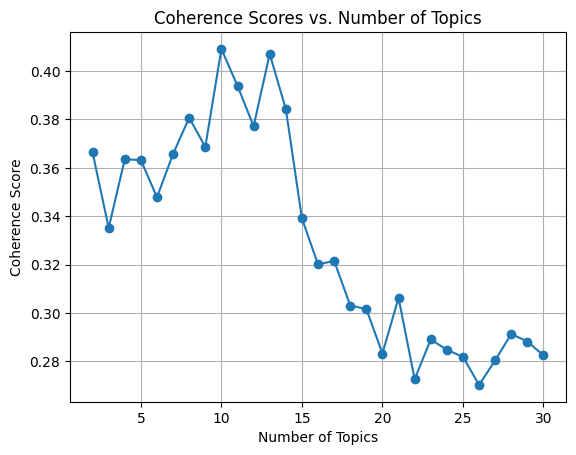

In [216]:
### Caluclate Coherence Scores based on the expert increased corpus

import nltk
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import corpus2csc

# Tokenize the tweets
tweets_tokenized_scen3 = tweets_final_expert_weighted['tweets'].apply(nltk.word_tokenize)

#calculate coherence scores
coherence_scores_scen3 = calculate_coherence_scores(tweets_tokenized_scen3, start=2, end=31, step=1)

# Print the coherence scores
for num_topics, coherence_score in coherence_scores_scen3:
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

# Run the function with the calculated coherence scores
plot_coherence_scores(coherence_scores_scen3)

In [173]:
# Keep a copy of the tokenized tweets with the original index
tweets_tokenized_scen3_with_index = tweets_final_expert_weighted.copy()
tweets_tokenized_scen3_with_index['tweets'] = tweets_tokenized_scen3

tweets_tokenized_scen3_with_index

,tweets,expertise_score,tweet_index
0,"[dear, ever, thought, make, doorstep, deliveri...",97.14,80
1,"[dear, ever, thought, make, doorstep, deliveri...",97.14,80
2,"[dear, ever, thought, make, doorstep, deliveri...",97.14,80
3,"[dear, ever, thought, make, doorstep, deliveri...",97.14,80
4,"[dear, ever, thought, make, doorstep, deliveri...",97.14,80
...,...,...,...
104000,"[pack, stainless, steel, reusabl, straw, code,...",0.01,919
104001,"[pack, silicon, reusabl, bake, cupcak, liner, ...",0.01,630
104002,"[pack, fabric, pot, shovel, code, wzclnwagahva...",0.01,632
104003,"[great, see, strive, toward, better, sustain, ...",0.01,3923


In [48]:
### illustration of number of topics and respective coherence scores

import matplotlib.pyplot as plt

def plot_coherence_scores(coherence_scores):
    # Extract the number of topics and coherence scores
    num_topics_list, coherence_scores_list = zip(*coherence_scores)

    # Plot the coherence scores
    plt.plot(num_topics_list, coherence_scores_list, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Scores vs. Number of Topics')
    plt.grid()
    plt.show()


# Plot the coherence scores without textual output
#plot_coherence_scores(coherence_scores_scen3_2)



In [144]:
#train LDA model of weighted tweets with found out best number of topics

from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

def train_lda_model(texts, num_topics):
    # Prepare a dictionary and corpus for Gensim
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Train an LDA model with the specified number of topics
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

    return lda

def print_top_terms(lda_model, num_terms=7):
    for i in range(lda_model.num_topics):
        terms = [term for term, _ in lda_model.show_topic(i, topn=num_terms)]
        print(f"Topic {i+1}: {', '.join(terms)}")

# Specify the optimal number of topics
optimal_num_topics_scen3 = 10  # Replace this with the optimal number of topics 

# Train the LDA model with the optimal number of topics
lda_model_scen3 = train_lda_model(tweets_tokenized_scen3, optimal_num_topics_scen3)

# Print the 7 most frequent terms for each topic
print_top_terms(lda_model_scen3)


Topic 1: new, announc, invest, project, launch, sustain, team
Topic 2: way, big, box, compani, wast, reduc, busi
Topic 3: via, great, chang, energi, renew, strive, one
Topic 4: link, packag, green, post, reusabl, use, go
Topic 5: help, effort, join, support, leader, creat, bring
Topic 6: straw, b, dont, buy, drive, hey, cant
Topic 7: sustain, pack, make, better, toward, deliveri, made
Topic 8: product, group, program, good, corpor, start, look
Topic 9: see, amazon, commit, valu, carbon, consum, via
Topic 10: climat, pledg, view, work, electr, custom, part


LDA Model - Scenario 1 - no weights

Number of Topics: 2, Coherence Score: 0.2394
Number of Topics: 3, Coherence Score: 0.2538
Number of Topics: 4, Coherence Score: 0.2799
Number of Topics: 5, Coherence Score: 0.2578
Number of Topics: 6, Coherence Score: 0.2973
Number of Topics: 7, Coherence Score: 0.3320
Number of Topics: 8, Coherence Score: 0.3296
Number of Topics: 9, Coherence Score: 0.3382
Number of Topics: 10, Coherence Score: 0.3660
Number of Topics: 11, Coherence Score: 0.3393
Number of Topics: 12, Coherence Score: 0.3502
Number of Topics: 13, Coherence Score: 0.3729
Number of Topics: 14, Coherence Score: 0.3930
Number of Topics: 15, Coherence Score: 0.3692
Number of Topics: 16, Coherence Score: 0.3749
Number of Topics: 17, Coherence Score: 0.3902
Number of Topics: 18, Coherence Score: 0.3852
Number of Topics: 19, Coherence Score: 0.4072
Number of Topics: 20, Coherence Score: 0.3938
Number of Topics: 21, Coherence Score: 0.4156
Number of Topics: 22, Coherence Score: 0.4158
Number of Topics: 23, Coherence Score: 0.4

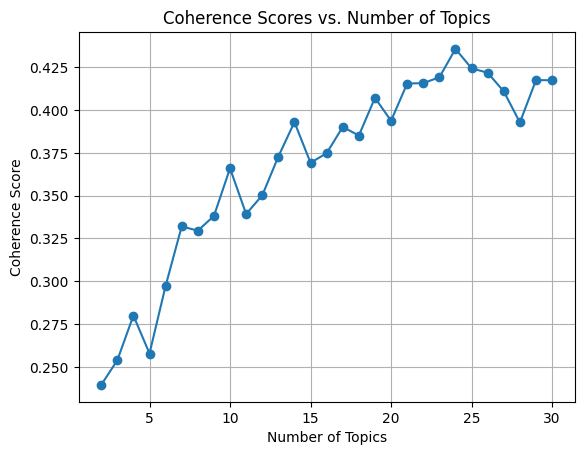

In [217]:
###########SCENARIO 1################
# Creating a term document matrix with no weights

from sklearn.feature_extraction.text import CountVectorizer

# Tokenize the tweets
tweets_tokenized_scen1 = tweets_final['tweets'].apply(nltk.word_tokenize)

#keep a copy of the tokenized tweets with an index 


# Calculate coherence scores for a range of topic numbers (2-20)
coherence_scores_scen1 = calculate_coherence_scores(tweets_tokenized_scen1, start=2, end=31, step=1)

# Print the coherence scores
for num_topics, coherence_score in coherence_scores_scen1:
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

# Run the function with the calculated coherence scores
plot_coherence_scores(coherence_scores_scen1)


In [51]:
#keep a copy of the tokenized tweets with an index 
tweets_tokenized_scen1_with_index = tweets_final.copy()
tweets_tokenized_scen1_with_index['tweets'] = tweets_tokenized_scen1
tweets_tokenized_scen1_with_index



,tweets,expertise_score,tweet_index
0,"[violat, children, onlin, protect, act, rule, ...",0.32,0
1,"[want, pay, million, penalti, overhaul, delet,...",0.49,1
2,"[violat, children, onlin, protect, act, rule, ...",1.00,2
3,"[exactli, one, month, sinc, open, host, event,...",0.32,3
4,"[manag, get, costli, retail, mani, return, ite...",20.02,4
...,...,...,...
4358,"[hq, seattl, walkabl, urban, environ]",0.07,4358
4359,"[bought, dummi, via]",20.00,4359
4360,"[review, grow, pizza, via]",0.00,4360
4361,"[review, grow, pizza, via]",0.02,4361


In [219]:
# Specify the optimal number of topics
optimal_num_topics_scen1 = 24  # Replace this with the optimal number of topics 

# Train the LDA model with the optimal number of topics
lda_model_scen1 = train_lda_model(tweets_tokenized_scen1, optimal_num_topics_scen1)

# Print the 7 most frequent terms for each topic
print_top_terms(lda_model_scen1)


Topic 1: see, would, term, ventur, welcom, new, startup
Topic 2: packag, commit, deliveri, think, compani, custom, reduc
Topic 3: compani, love, dont, care, seriou, back, sell
Topic 4: support, help, profit, effort, ship, noth, join
Topic 5: paper, wrap, stop, take, need, bubbl, place
Topic 6: amazon, plant, tree, one, number, singl, releas
Topic 7: guy, differ, encourag, product, togeth, new, sustain
Topic 8: green, way, go, help, build, leader, top
Topic 9: order, via, im, box, person, rais, chang
Topic 10: bag, check, sustain, product, item, respons, resel
Topic 11: sustain, fuel, speed, amazon, virginia, new, letter
Topic 12: last, deliveri, month, sustain, truck, store, expand
Topic 13: box, lead, food, carbon, pleas, excit, footprint
Topic 14: better, environment, tri, problem, reason, get, world
Topic 15: energi, design, sustain, global, renew, world, amazon
Topic 16: pack, season, week, lab, june, focu, world
Topic 17: time, prime, day, half, chang, make, great
Topic 18: via, t

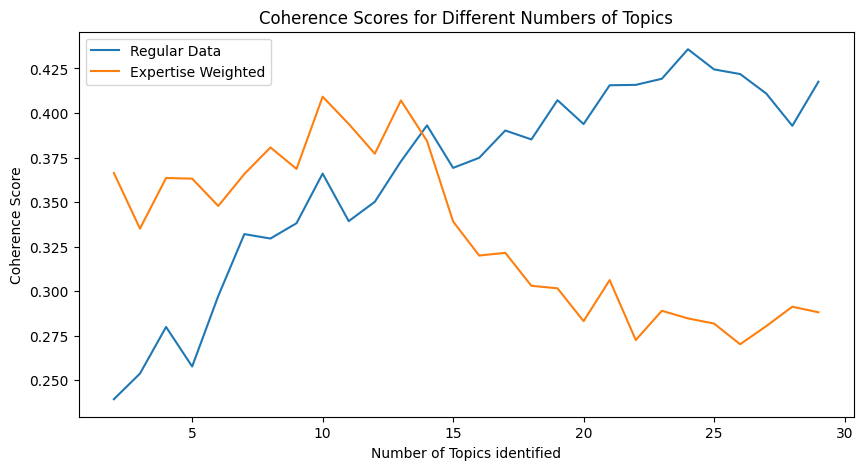

In [168]:
#### comparison of coherence betweetn scen 1 and scen 3

import matplotlib.pyplot as plt

# Extract number of topics and corresponding coherence scores
num_topics_scen1, coherence_scen1 = zip(*coherence_scores_scen1)
num_topics_scen3, coherence_scen3 = zip(*coherence_scores_scen3)

plt.figure(figsize=(10,5))

# Plot coherence scores for scenario 1
plt.plot(num_topics_scen1, coherence_scen1, label='Regular Data')

# Plot coherence scores for scenario 3
plt.plot(num_topics_scen3, coherence_scen3, label='Expertise Weighted')

plt.xlabel("Number of Topics identified")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.legend()
plt.show()



LDA MODEL - Scenario 2 - random weights

In [146]:
##########Scenario 2########

#create a new dataframe with shuffled expertise scores
import random
tweets_final_random_weighted = tweets_final.copy()
tweets_final_random_weighted['expertise_score'] = tweets_final_random_weighted['expertise_score'].sample(frac=1, random_state=12).reset_index(drop=True)
#tweets_final_random_weighted['tweets'] = tweets_final_random_weighted['tweets'].sample(frac=1, random_state=12).reset_index(drop=True)


#increase the corpus based on random weights
frames = [] # each temporary dataframe will be appended to this list

# Loop through the rows in the original DataFrame
for _, row in tweets_final_random_weighted.iterrows():
    # Determine the number of repetitions for this row
    repetitions = int(np.ceil(row['expertise_score']))
    
    # Create a temporary DataFrame containing repeated rows
    temp_df = pd.DataFrame([row]*repetitions)
    
    # Append the temporary DataFrame to the list
    frames.append(temp_df)

# Concatenate all the frames
tweets_final_random_weighted = pd.concat(frames, ignore_index=True)

print(f"The DataFrame has {tweets_final_random_weighted.shape[0]} rows and {tweets_final_random_weighted.shape[1]} columns.")

tweets_final_random_weighted





The DataFrame has 104005 rows and 3 columns.


,tweets,expertise_score,tweet_index
0,dear ever thought make doorstep deliveri susta...,55.48,80
1,dear ever thought make doorstep deliveri susta...,55.48,80
2,dear ever thought make doorstep deliveri susta...,55.48,80
3,dear ever thought make doorstep deliveri susta...,55.48,80
4,dear ever thought make doorstep deliveri susta...,55.48,80
...,...,...,...
104000,intern commit nice step could much money influ...,30.24,1278
104001,intern commit nice step could much money influ...,30.24,1278
104002,intern commit nice step could much money influ...,30.24,1278
104003,intern commit nice step could much money influ...,30.24,1278


Number of Topics: 2, Coherence Score: 0.2819
Number of Topics: 3, Coherence Score: 0.2813
Number of Topics: 4, Coherence Score: 0.2994
Number of Topics: 5, Coherence Score: 0.3389
Number of Topics: 6, Coherence Score: 0.3620
Number of Topics: 7, Coherence Score: 0.3696
Number of Topics: 8, Coherence Score: 0.4049
Number of Topics: 9, Coherence Score: 0.3953
Number of Topics: 10, Coherence Score: 0.4118
Number of Topics: 11, Coherence Score: 0.4370
Number of Topics: 12, Coherence Score: 0.4062
Number of Topics: 13, Coherence Score: 0.4301
Number of Topics: 14, Coherence Score: 0.4083
Number of Topics: 15, Coherence Score: 0.3708
Number of Topics: 16, Coherence Score: 0.3766
Number of Topics: 17, Coherence Score: 0.3626
Number of Topics: 18, Coherence Score: 0.3039
Number of Topics: 19, Coherence Score: 0.3317
Number of Topics: 20, Coherence Score: 0.3211
Number of Topics: 21, Coherence Score: 0.3093
Number of Topics: 22, Coherence Score: 0.3302
Number of Topics: 23, Coherence Score: 0.3

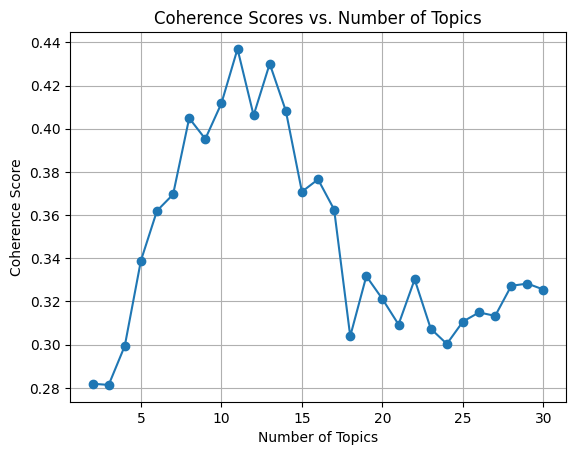

In [218]:
# Tokenize the tweets
tweets_tokenized_scen2 = tweets_final_random_weighted['tweets'].apply(nltk.word_tokenize)

# Calculate the coherence scores
coherence_scores_scen2 = calculate_coherence_scores(tweets_tokenized_scen2, start=2, end=31, step=1)

# Print the coherence scores
for num_topics, coherence_score in coherence_scores_scen2:
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

# Run the function with the calculated coherence scores
plot_coherence_scores(coherence_scores_scen2)



In [148]:
tweets_tokenized_scen2_with_index = tweets_final_random_weighted.copy()
tweets_tokenized_scen2_with_index['tweets'] = tweets_tokenized_scen2

tweets_tokenized_scen2_with_index

,tweets,expertise_score,tweet_index
0,"[dear, ever, thought, make, doorstep, deliveri...",55.48,80
1,"[dear, ever, thought, make, doorstep, deliveri...",55.48,80
2,"[dear, ever, thought, make, doorstep, deliveri...",55.48,80
3,"[dear, ever, thought, make, doorstep, deliveri...",55.48,80
4,"[dear, ever, thought, make, doorstep, deliveri...",55.48,80
...,...,...,...
104000,"[intern, commit, nice, step, could, much, mone...",30.24,1278
104001,"[intern, commit, nice, step, could, much, mone...",30.24,1278
104002,"[intern, commit, nice, step, could, much, mone...",30.24,1278
104003,"[intern, commit, nice, step, could, much, mone...",30.24,1278


In [149]:
#train an lda model for scenario 2

# Specify the optimal number of topics
optimal_num_topics_scen2 = 11  # Replace this with the optimal number of topics 

# Train the LDA model with the optimal number of topics
lda_model_scen2 = train_lda_model(tweets_tokenized_scen2, optimal_num_topics_scen2)

# Print the 7 most frequent terms for each topic
print_top_terms(lda_model_scen2)

Topic 1: would, nice, commit, plastic, new, launch, look
Topic 2: wast, check, work, energi, lead, project, return
Topic 3: set, reduc, better, item, big, impact, back
Topic 4: commit, step, exampl, influenc, deliveri, see, make
Topic 5: box, product, new, way, start, like, program
Topic 6: amazon, brand, drive, hey, benefit, contribut, laptop
Topic 7: much, intern, via, order, time, chang, recycl
Topic 8: could, money, packag, ship, go, green, dont
Topic 9: use, electr, want, love, zero, fleet, build
Topic 10: sustain, climat, pledg, effort, compani, new, announc
Topic 11: custom, busi, environment, pleas, sustain, onlin, help


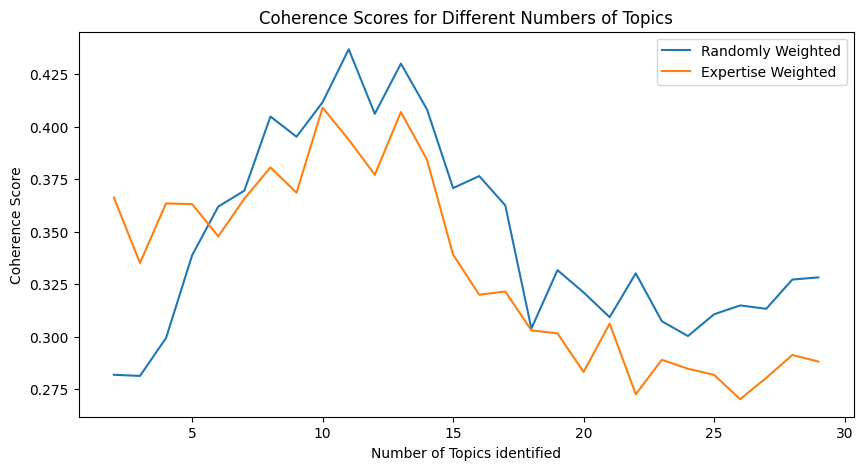

In [158]:
# comparison between scen2 and scen3

# Extract number of topics and corresponding coherence scores
num_topics_scen2, coherence_scen2 = zip(*coherence_scores_scen2)
num_topics_scen3, coherence_scen3 = zip(*coherence_scores_scen3)

plt.figure(figsize=(10,5))

# Plot coherence scores for scenario 1
plt.plot(num_topics_scen2, coherence_scen2, label='Randomly Weighted')

# Plot coherence scores for scenario 3
plt.plot(num_topics_scen3, coherence_scen3, label='Expertise Weighted')

plt.xlabel("Number of Topics identified")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.legend()
plt.show()

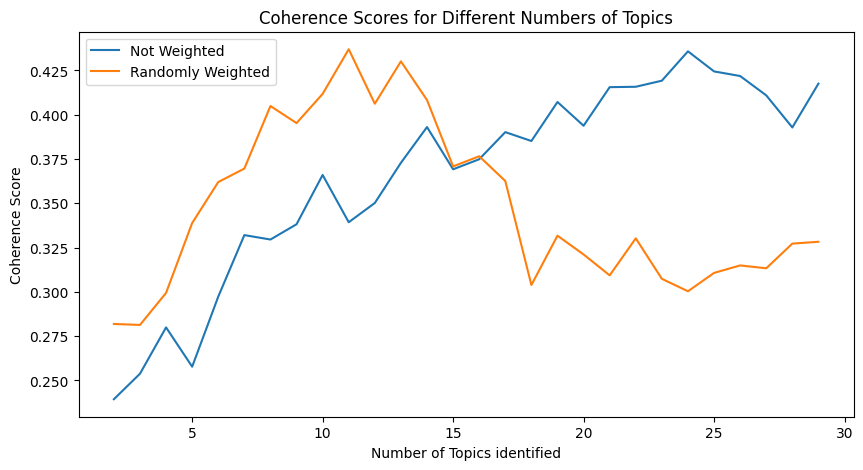

In [159]:
### comparison between scen 1 und scen 2

# Extract number of topics and corresponding coherence scores
num_topics_scen1, coherence_scen1 = zip(*coherence_scores_scen1)
num_topics_scen2, coherence_scen2 = zip(*coherence_scores_scen2)

plt.figure(figsize=(10,5))

# Plot coherence scores for scenario 1
plt.plot(num_topics_scen1, coherence_scen1, label='Not Weighted')

# Plot coherence scores for scenario 3
plt.plot(num_topics_scen2, coherence_scen2, label='Randomly Weighted')

plt.xlabel("Number of Topics identified")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.legend()
plt.show()

COMPARISON OF DIFFERENT SCENARIOS

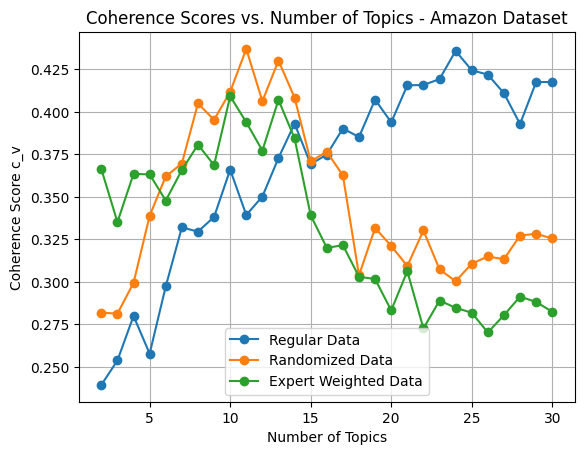

In [220]:
###comparison of different coherence scores for topics

import matplotlib.pyplot as plt

def plot_multiple_coherence_scores(scenario1, scenario2, scenario3):
    # Extract the number of topics and coherence scores for each scenario
    num_topics_list1, coherence_scores_list1 = zip(*scenario1)
    num_topics_list2, coherence_scores_list2 = zip(*scenario2)
    num_topics_list3, coherence_scores_list3 = zip(*scenario3)

    # Plot the coherence scores for each scenario
    plt.plot(num_topics_list1, coherence_scores_list1, marker='o', label='Regular Data')
    plt.plot(num_topics_list2, coherence_scores_list2, marker='o', label='Randomized Data')
    plt.plot(num_topics_list3, coherence_scores_list3, marker='o', label='Expert Weighted Data')

    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score c_v')
    plt.title('Coherence Scores vs. Number of Topics - Amazon Dataset')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_multiple_coherence_scores(coherence_scores_scen1, coherence_scores_scen2, coherence_scores_scen3)

In [221]:
#1 - Comparison of all 3 scenarios with their best number of topics and the respective coherence score

print("Scenario 1: No weights")
print(f"Best number of topics: {optimal_num_topics_scen1}")
print(f"Coherence score: {dict(coherence_scores_scen1)[optimal_num_topics_scen1]:.4f}\n")

print("Scenario 2: Random weights")
print(f"Best number of topics: {optimal_num_topics_scen2}")
print(f"Coherence score: {dict(coherence_scores_scen2)[optimal_num_topics_scen2]:.4f}\n")

print("Scenario 3: Expert weights")
print(f"Best number of topics: {optimal_num_topics_scen3}")
print(f"Coherence score: {dict(coherence_scores_scen3)[optimal_num_topics_scen3]:.4f}\n")



Scenario 1: No weights
Best number of topics: 24
Coherence score: 0.4358

Scenario 2: Random weights
Best number of topics: 11
Coherence score: 0.4370

Scenario 3: Expert weights
Best number of topics: 10
Coherence score: 0.4091



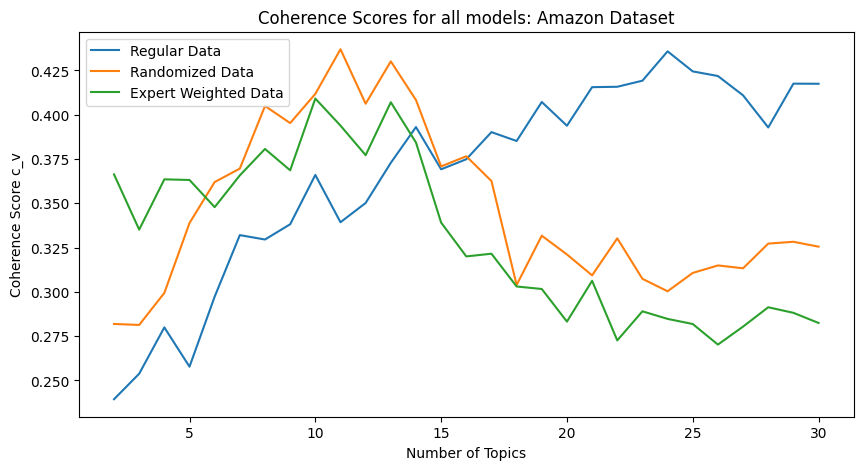

In [222]:
import matplotlib.pyplot as plt

x_values = [num_topics for num_topics, _ in coherence_scores_scen1]
y_values1 = [coherence_score for _, coherence_score in coherence_scores_scen1]
y_values2 = [coherence_score for _, coherence_score in coherence_scores_scen2]
y_values3 = [coherence_score for _, coherence_score in coherence_scores_scen3]

plt.figure(figsize=(10,5))

plt.plot(x_values, y_values1, label="Regular Data")
plt.plot(x_values, y_values2, label="Randomized Data")
plt.plot(x_values, y_values3, label="Expert Weighted Data")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score c_v")
plt.title("Coherence Scores for all models: Amazon Dataset")
plt.legend()
plt.show()


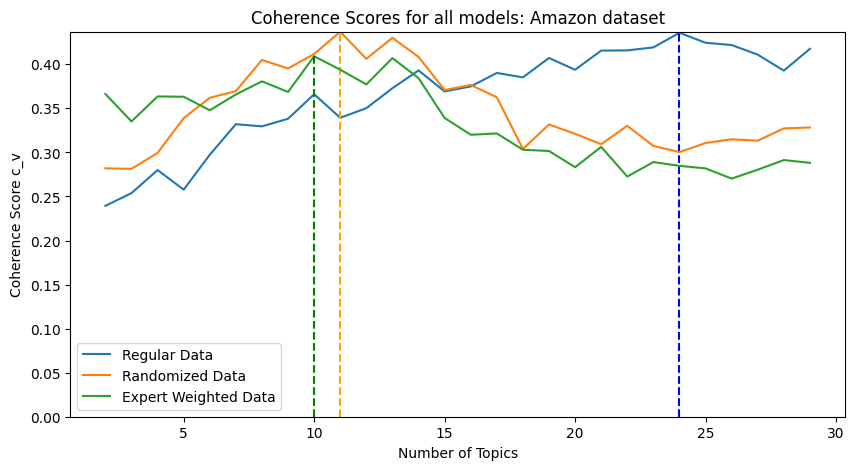

In [211]:
import matplotlib.pyplot as plt
import numpy as np

x_values = [num_topics for num_topics, _ in coherence_scores_scen1]
y_values1 = [coherence_score for _, coherence_score in coherence_scores_scen1]
y_values2 = [coherence_score for _, coherence_score in coherence_scores_scen2]
y_values3 = [coherence_score for _, coherence_score in coherence_scores_scen3]

plt.figure(figsize=(10,5))

plt.plot(x_values, y_values1, label="Regular Data")
max_y1 = max(y_values1)
max_x1 = x_values[np.argmax(y_values1)]
plt.vlines(max_x1, 0, max_y1, colors='blue', linestyles='dashed')

plt.plot(x_values, y_values2, label="Randomized Data")
max_y2 = max(y_values2)
max_x2 = x_values[np.argmax(y_values2)]
plt.vlines(max_x2, 0, max_y2, colors='orange', linestyles='dashed')

plt.plot(x_values, y_values3, label="Expert Weighted Data")
max_y3 = max(y_values3)
max_x3 = x_values[np.argmax(y_values3)]
plt.vlines(max_x3, 0, max_y3, colors='green', linestyles='dashed')

plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score c_v")
plt.title("Coherence Scores for all models: Amazon dataset")
plt.legend()

# set y-limits to ensure vertical lines reach the x-axis
plt.ylim([0, max(max_y1, max_y2, max_y3)])

plt.show()




Top2Vec Algorithm for the 3 Scenarios

In [ ]:
###top2vec Scenario 1 - no weights###

from top2vec import Top2Vec

# Combine all tweets into a list of sentences
document_top2vec_scen1 = tweets_final['tweets'].tolist()

# Create the Top2Vec model
model = Top2Vec(document_top2vec_scen1, speed="learn", workers=4)

# Print the number of topics found
top2vec_num_topics_scen1 = model.get_num_topics()
print(top2vec_num_topics_scen1)



In [ ]:
# Get the words and word scores for each topic
for i in range(top2vec_num_topics_scen1):
    topic_words, word_scores, topic_nums = model.get_topics(i)
    print(f"Topic #{i+1}")
    for word, score in zip(topic_words, word_scores):
        print(f"{word} ({score})")
    print("\n")


CREATION OF EXPERT OUTPUTS

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(lda_model, topic_id, num_terms=30):
    
    # Extract terms and their relative probabilities
    terms = lda_model.show_topic(topic_id, num_terms)
    term_probabilities = {term: prob for term, prob in terms}

    # Create wordcloud object
    wordcloud = WordCloud(width=1200, height=600, background_color='white')

    # Generate wordcloud
    wordcloud = wordcloud.generate_from_frequencies(term_probabilities)
    
    return wordcloud


In [185]:
def get_representative_tweets_2(lda_model, corpus, topic, num_tweets, tweets_tokenized, original_tweets):
    """Get the representative tweets for a specific topic."""
    topic_distribution = lda_model.get_document_topics(corpus, minimum_probability=0.0)
    topic_tweets = sorted(((enum, max((t[1] for t in dist if t[0] == topic), default=0)) for enum, dist in enumerate(topic_distribution)), 
                          key=lambda x: -x[1])
    indices = []
    selected_tweet_indices = set()
    for i, _ in topic_tweets:
        tweet_index = tweets_tokenized['tweet_index'][i]
        if tweet_index not in selected_tweet_indices and original_tweets.loc[tweet_index, 'Tweet Type'] == 'Tweet':
            selected_tweet_indices.add(tweet_index)
            indices.append(tweet_index)
        if len(indices) == num_tweets:
            break
    return [original_tweets.loc[i]['Tweet Content'] for i in indices]


def get_representative_tweets(lda_model, corpus, topic, num_tweets, tweets_tokenized, original_tweets):
    """Get the representative tweets for a specific topic."""
    topic_distribution = lda_model.get_document_topics(corpus, minimum_probability=0.0)
    topic_tweets = sorted(((enum, max((t[1] for t in dist if t[0] == topic), default=0)) for enum, dist in enumerate(topic_distribution)), 
                          key=lambda x: -x[1])
    indices = []
    selected_tweet_indices = set()
    for i, _ in topic_tweets:
        tweet_index = tweets_tokenized['tweet_index'][i]
        if tweet_index not in selected_tweet_indices:
            selected_tweet_indices.add(tweet_index)
            indices.append(tweet_index)
        if len(indices) == num_tweets:
            break
    return [original_tweets.loc[i]['Tweet Content'] for i in indices]

def generate_output_volume(lda_model, corpus, dictionary, num_topics, num_representative_tweets, tweet_indices, original_tweets):
    """Generate and print the output for the LDA model."""

    # Get the topic distribution for all tweets
    topic_distribution = lda_model.get_document_topics(corpus, minimum_probability=0.0)

    # Initialize a dictionary to store the total probability for each topic
    total_probabilities = {i: 0 for i in range(num_topics)}

    # Loop over the topic distribution for each tweet
    for tweet_distribution in topic_distribution:
        # Add the probability for each topic to the total
        for topic, prob in tweet_distribution:
            total_probabilities[topic] += prob

    # Sort the topics by total probability
    sorted_topics = sorted(total_probabilities.items(), key=lambda x: -x[1])

    # The first 4 topics in sorted_topics are the ones with the most conversation volume
    top_topics = [topic[0] for topic in sorted_topics[:4]]

    # First generate output for top 4 topics
    for topic in top_topics:
        # Print the topic number
        print(f"Topic: {topic}")

        # Create and display the word cloud
        plt.figure()
        plt.imshow(create_wordcloud(lda_model, topic), interpolation='bilinear')
        plt.axis('off')
        plt.show()

        # Print the most representative tweets
        print(f"Most Representative Tweets for Topic: {topic}")
        topic_tweets = get_representative_tweets_2(lda_model, corpus, topic, num_representative_tweets, tweet_indices, original_tweets)
        for tweet in topic_tweets:
            print("---" * 20)
            print(f"- {tweet}")
            print("---" * 20)

        print("\n")

#train an lda model that also gives out the corpus and dictionairy it uses
def train_lda_model_2(texts, num_topics):
    # Prepare a dictionary and corpus for Gensim
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Train an LDA model with the specified number of topics
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

    return lda, corpus, dictionary
       



Ouput - No weights

In [64]:
#define corpus
_, corpus_scen1, _ = train_lda_model_2(tweets_tokenized_scen1, optimal_num_topics_scen1)

#define dictionary 
_, _, dictionary_scen1 = train_lda_model_2(tweets_tokenized_scen1, optimal_num_topics_scen1)



In [176]:
print(2598 in tweets_tokenized_scen1_with_index)
print(2598 in df.index)

False
True


Topic: 1


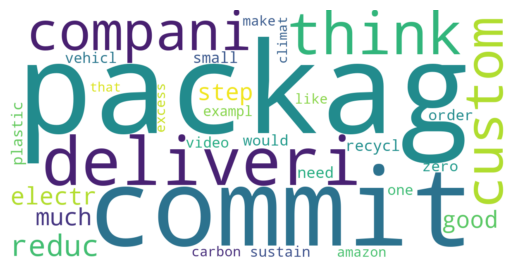

Most Representative Tweets for Topic: 1
------------------------------------------------------------
- "Did @amazon violate the Children’s Online #Privacy Protection Act Rule with its Alexa #voiceassistant? @FTC says yes. https://t.co/A0Pq93LV8x #IoT #sustainability #AI #5G #cloud #edge #digitaltransformation #machinelearning https://t.co/ZZz6fp5ouA"
------------------------------------------------------------
------------------------------------------------------------
- "#CyberMonday is the biggest online retail day of the year, so how #sustainable are online retailers?
🔎 Use Enablesus to find out about the #sustainability of some of the leading online retailers such as @amazon @ZalandoTech @Walmart  @ASOS etc.
Read more: https://t.co/SWDTaA6rXp https://t.co/N8Zy4g2Tk8"
------------------------------------------------------------
------------------------------------------------------------
- "Thanks @SnapperMowers for making an all electric mower.  No more gas/oil powered lawn equipm

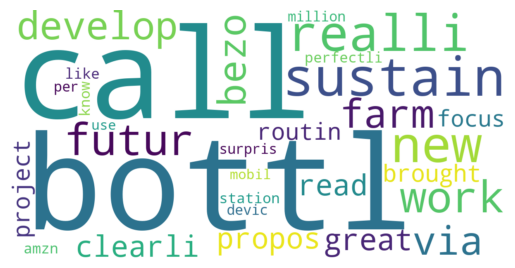

Most Representative Tweets for Topic: 19
------------------------------------------------------------
- ".@amazon invests in The Climate Pledge Fund. #sustainability #retail #amazon #housewares #homeworld https://t.co/RAoj53qXOx"
------------------------------------------------------------
------------------------------------------------------------
- ".@amazon launches a $2 billion ‘Climate Pledge’ fund to invest in sustainable technologies while pledging 100% clean energy by 2030.

#technews #Sustainability #cleanenergy #businessnews #sustainabletech 

https://t.co/sAxaB0K493"
------------------------------------------------------------
------------------------------------------------------------
- ". @amazon launches a $2 billion ‘Climate Pledge’ fund to invest in sustainable technologies while pledging 100% clean energy by 2030.

#technews #Sustainability #cleanenergy #businessnews #sustainabletech 

https://t.co/jQOYgGeloh"
---------------------------------------------------------

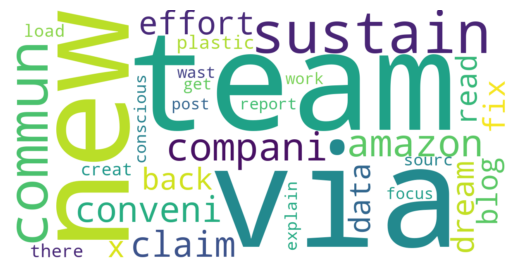

Most Representative Tweets for Topic: 17
------------------------------------------------------------
- "@USCCFoundation hosts webinar tmrw w/@BrentNelson2013 @amazon, @tetrapak &amp; @CBDavidsonPhD @WestRock #Sustainability https://t.co/syYnbObgXN"
------------------------------------------------------------
------------------------------------------------------------
- "@amazon is hiring a #Sustainability Software Engineer. @Sustain_Leads https://t.co/MH5gF41KTJ #greenjobs"
------------------------------------------------------------
------------------------------------------------------------
- "A patient-centric #healthcare model is where we must go. Will @amazon &amp; @onemedical help get us there? https://t.co/0hx451k2Pp #IoT #sustainability #AI #5G #cloud #edge #digitaltransformation #machinelearning @amazonnews https://t.co/8mhA5JT5At"
------------------------------------------------------------


Topic: 13


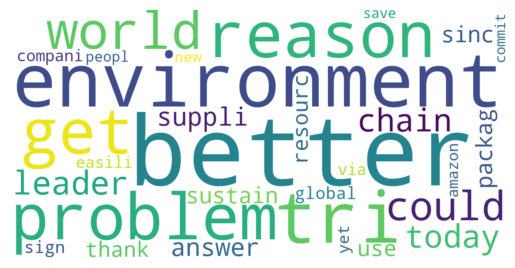

Most Representative Tweets for Topic: 13
------------------------------------------------------------
- "@Amazon launches "Climate Pledge Friendly" program #sustainability #labeling #customerchoice https://t.co/pWsAioyCL3"
------------------------------------------------------------
------------------------------------------------------------
- "@amazon Launches "Climate Pledge Friendly" Program https://t.co/E83VvM0fRX #beautyindustrynews #Sustainability #COSMETICS https://t.co/8O3NtAmbud"
------------------------------------------------------------
------------------------------------------------------------
- ".@amazon could gain access to even more intimate facts about our most private spaces. https://t.co/73D8x5855R #IoT #sustainability #AI #5G #cloud #edge #futureofwork #digitaltransformation #green #ecosystem #environmental #circularworld https://t.co/XJb9MxXGsd"
------------------------------------------------------------




In [191]:
generate_output_volume(lda_model_scen1, corpus_scen1, dictionary_scen1, optimal_num_topics_scen1, 3, tweets_tokenized_scen1_with_index, df)

Output - Expert Weights

In [179]:
# define corpus
_, corpus_scen3, _ = train_lda_model_2(tweets_tokenized_scen3, optimal_num_topics_scen3)

#define dictionary 
_, _, dictionary_scen3 = train_lda_model_2(tweets_tokenized_scen3, optimal_num_topics_scen3)

Topic: 3


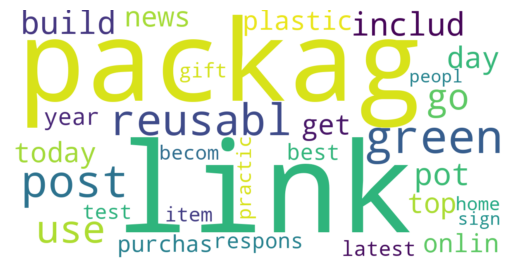

Most Representative Tweets for Topic: 3
------------------------------------------------------------
- "RT: @caelusgreenroom THE ULTIMATE GUIDE TO GREENING YOUR HOME - Over 1000 money saving tips. Get your copy today at @amazon - https://t.co/HM5vS2QKvM   #sustainability #green #csrpic.twitter.com/Vabij8xVjz - THE ULTIMATE GUIDE TO GREENING YOUR HOME - ... https://t.co/7NsPh7Fv0D"
------------------------------------------------------------
------------------------------------------------------------
- "THE ULTIMATE GUIDE TO GREENING YOUR HOME - Over 1000 money saving tips. Get your copy today at @amazon - https://t.co/cNlGPAaQ3J #sustainability #green #csr https://t.co/WTtbokJaSg"
------------------------------------------------------------
------------------------------------------------------------
- "THE ULTIMATE GUIDE TO GREENING YOUR HOME - Over 1000 money saving tips. Get your copy today at @amazon - https://t.co/61ib8dnsVN #sustainability #green #csr https://t.co/PgfifXeY6m"
--

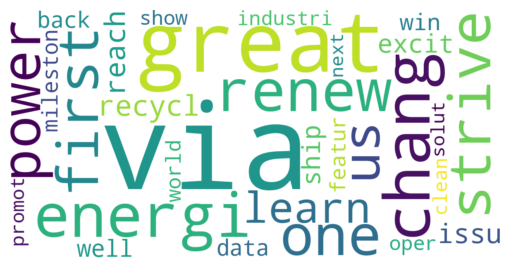

Most Representative Tweets for Topic: 2
------------------------------------------------------------
- "Upcycled Belt Buckle Gem Glass Beaded Bracelet from #BreakingLineCreation https://t.co/fDHK9RarSB via @amazon #ecofashion #sustainability"
------------------------------------------------------------
------------------------------------------------------------
- "Transparency: An app backed by @Google, @Amazon and @Facebook collects #sustainability data, via @GuardianSustBiz http://t.co/iHSbplevNn"
------------------------------------------------------------
------------------------------------------------------------
- "The #smarthome market still faces hurdles such as interoperability. What can be done? https://t.co/U33kxngePp #IoT #AI #5G #cloud #machinelearning #bigdata #digitaltransformation #cybersecurity #blockchain #sustainability .@amazon .@Apple .@Google .@zigbeealliance .@McKinsey https://t.co/OeJLf7b0fB"
------------------------------------------------------------


Topic

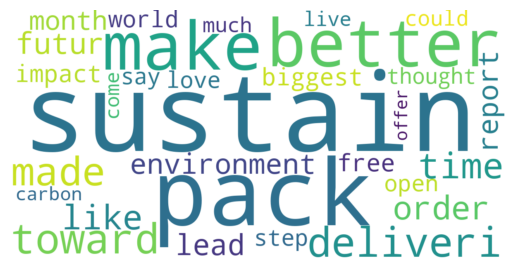

Most Representative Tweets for Topic: 6
------------------------------------------------------------
- "17 key roles open now: growing,hiring &amp; we love #sustainability @amazon https://t.co/WPqGE4GEid @netimpact @SustainableJobs @ELDaily"
------------------------------------------------------------
------------------------------------------------------------
- "Why cities should resist @Amazon's 2nd headquarters: https://t.co/tLes1u8dO6 @CapInstitute #Sustainability #Amazon https://t.co/WjXN8jlFpp"
------------------------------------------------------------
------------------------------------------------------------
- "Why cities should resist @Amazon's 2nd headquarters: https://t.co/tLes1u8dO6 @CapInstitute #Sustainability #Amazon https://t.co/WjXN8jlFpp https://t.co/HXh84nLpDp"
------------------------------------------------------------


Topic: 8


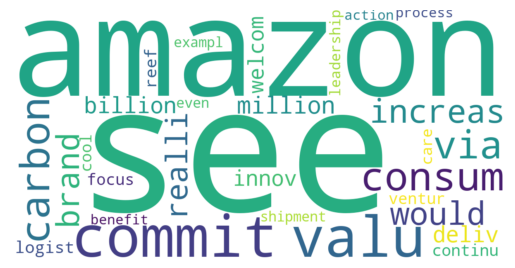

Most Representative Tweets for Topic: 8
------------------------------------------------------------
- "What is the reason for the astronomical rise of @amazon 

Is it relentless incremental #innovation ?

or 

Is it trying #disruptive innovation without being afraid to fail?

#technology #startups #entrepreneurship #leadership #business #sustainability #management #melvinmathews https://t.co/1E37OdRsR9"
------------------------------------------------------------
------------------------------------------------------------
- "Cool Camping Gear: EcoZoom Rocket Stove - Versa by EcoZoom for $129.82 https://t.co/c1c0ijBYGF via @amazon
#camping #survival #backpacking #SelfReliance #Sustainability"
------------------------------------------------------------
------------------------------------------------------------
- "Op-ed: Even if consumers do not see the edge @Amazon would gain if it committed further to #sustainability, it is Jeff Bezos’ responsibility to do so-especially as someone 

In [192]:
generate_output_volume(lda_model_scen3, corpus_scen3, dictionary_scen3, optimal_num_topics_scen3, 3, tweets_tokenized_scen3_with_index, df)


Ouput - Random Weights

In [182]:
# define corpus
_, corpus_scen2, _ = train_lda_model_2(tweets_tokenized_scen2, optimal_num_topics_scen2)

#define dictionary 
_, _, dictionary_scen2 = train_lda_model_2(tweets_tokenized_scen2, optimal_num_topics_scen2)

Topic: 7


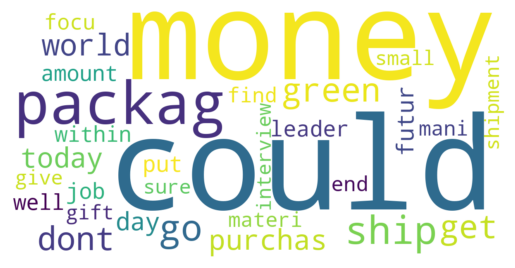

Most Representative Tweets for Topic: 7
------------------------------------------------------------
- "RT: @caelusgreenroom THE ULTIMATE GUIDE TO GREENING YOUR HOME - Over 1000 money saving tips. Get your copy today at @amazon - https://t.co/HM5vS2QKvM   #sustainability #green #csrpic.twitter.com/Vabij8xVjz - THE ULTIMATE GUIDE TO GREENING YOUR HOME - ... https://t.co/7NsPh7Fv0D"
------------------------------------------------------------
------------------------------------------------------------
- "THE ULTIMATE GUIDE TO GREENING YOUR HOME - Over 1000 money saving tips. Get your copy today at @amazon - https://t.co/cNlGPAaQ3J #sustainability #green #csr https://t.co/WTtbokJaSg"
------------------------------------------------------------
------------------------------------------------------------
- "THE ULTIMATE GUIDE TO GREENING YOUR HOME - Over 1000 money saving tips. Get your copy today at @amazon - https://t.co/T1nPts6AtY #sustainability #green #csr https://t.co/aiQVp6NlvF"
--

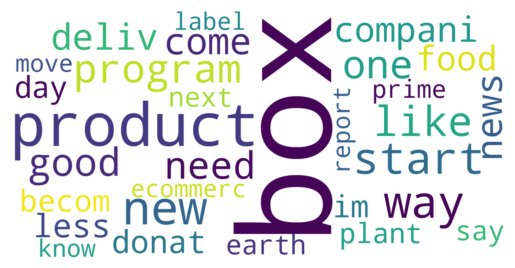

Most Representative Tweets for Topic: 4
------------------------------------------------------------
- ".@amazon is starting a program to donate unsold goods. Other companies should adopt this too. 

#Sustainability #renewable #GlobalGoals #SDGs

@AdamRogers2030 @SDGS4GOOD @NevilleGaunt @AmandaRay02 @helene_wpli @TheRudinGroup @psb_dc @HaroldSinnott @WSWMUC
https://t.co/HQW4bowEvg"
------------------------------------------------------------
------------------------------------------------------------
- "Other companies should follow #amazon by donating their unsold products to those who need them. 

#sustainability @amazon #ecommerce https://t.co/YB9gto27RC"
------------------------------------------------------------
------------------------------------------------------------
- "Yesterday, @Amazon released its 2020 #sustainability report. Here is our analysis of what it says and what it ignores. @SMEAatUW @uwpoe @UWEnvironment @uwnews @UWPCC 
https://t.co/t2QwQ4vsdh"
---------------

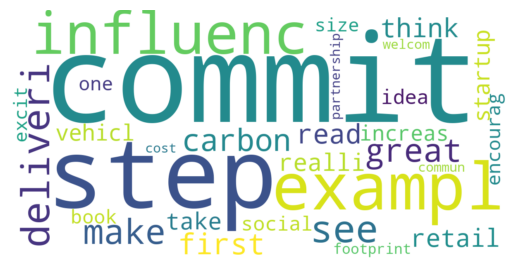

Most Representative Tweets for Topic: 3
------------------------------------------------------------
- "Great!
285 members in LinkedIn group
"SOCIAL MEDIA IN THE ENERGY SECTOR"; first ones from these companies (&amp;tag)
@irena @Tesla @SchneiderElec @siemens @EON_SE_en @amazon @axpo @Orsted @Aggreko_ @Statkraft @Shell @total
JOIN NOW: https://t.co/b3JJrFslBx
#Sustainability #renewables https://t.co/brobJJJnDP"
------------------------------------------------------------
------------------------------------------------------------
- "RT @APICS "We are excited to see @Amazon prioritizing #sustainability. Congrats to their first CSO @KaraHurst &gt;&gt;   (@GreenBiz)"..."
------------------------------------------------------------
------------------------------------------------------------
- "🌟🌟🌟🌟🌟Great Barrier Reef Rescue🐠 SONG BIRD SUPERHERO. REEF PROTECTOR. Empowers Kids to believe in themselves &amp; care for the Reef #selfbelief  #SaveReef #EcoWarrior #sustainability #schools @amazo

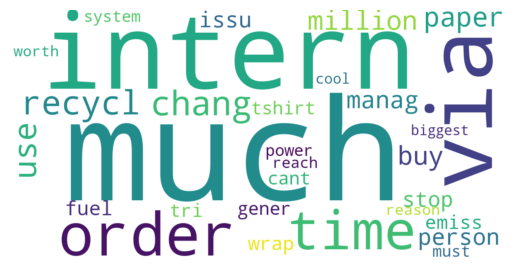

Most Representative Tweets for Topic: 6
------------------------------------------------------------
- "Cool Camping Gear: EcoZoom Rocket Stove - Versa by EcoZoom for $129.82 https://t.co/c1c0ijBYGF via @amazon
#camping #survival #backpacking #SelfReliance #Sustainability"
------------------------------------------------------------
------------------------------------------------------------
- "The #Sustainability Generation: The Politics of Change and Why Personal Accoun... https://t.co/CEO20OZgfn via @amazon"
------------------------------------------------------------
------------------------------------------------------------
- "The #Sustainability Generation: The Politics of Change and Why Personal Accoun... https://t.co/rbMSP5dBle via @amazon"
------------------------------------------------------------




In [193]:
generate_output_volume(lda_model_scen2, corpus_scen2, dictionary_scen2, optimal_num_topics_scen2, 3, tweets_tokenized_scen2_with_index, df)